In [1]:
import numpy as np
from tensorflow import keras
import utils

In [2]:
history_steps = 50
forecast_steps = 10
(x_train, y_train), (x_val, y_val), (x_test, y_test) = \
    utils.load_time_series_data_multiple_forecast(history_steps, forecast_steps)
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50, 1), y_train.shape = (7000, 50, 10)
x_val.shape = (2000, 50, 1), y_val.shape = (2000, 50, 10)
x_test.shape = (1000, 50, 1), y_test.shape = (1000, 50, 10)


In [3]:
utils.reset_session()

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding='causal', activation='relu', dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))

def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer=keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', last_time_step_mse])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0467 - mae: 0.1651 - last_time_step_mse: 0.0358 - val_loss: 0.0314 - val_mae: 0.1342 - val_last_time_step_mse: 0.0200
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0288 - mae: 0.1270 - last_time_step_mse: 0.0173 - val_loss: 0.0285 - val_mae: 0.1262 - val_last_time_step_mse: 0.0179
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0254 - mae: 0.1172 - last_time_step_mse: 0.0139 - val_loss: 0.0238 - val_mae: 0.1123 - val_last_time_step_mse: 0.0128
Epoch 4/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0233 - mae: 0.1109 - last_time_step_mse: 0.0116 - val_loss: 0.0231 - val_mae: 0.1098 - val_last_time_step_mse: 0.0115
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0216 - mae: 0.1056 - last_time_step_mse: 0.0099 - val_loss: 0.0203 - val_mae: 0.1007 - val_last_time_step_mse: 0.0085
Epoch 6/20
219/219 [==========

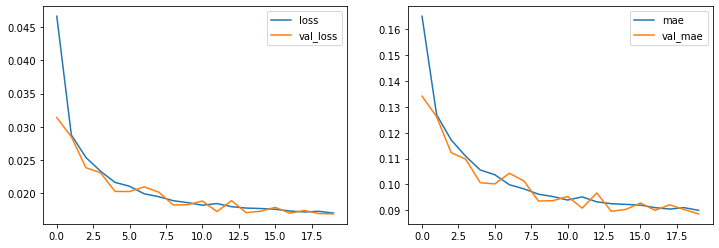

In [4]:
utils.plot_history(history)

In [5]:
model.evaluate(x_val, y_val)

63/63 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0886 - last_time_step_mse: 0.0060


[0.016878660768270493, 0.08859595656394958, 0.005997184664011002]

series.shape = (1, 60)
x_new.shape = (1, 50, 1), y_new.shape = (1, 10)
y_pred.shape = (1, 50, 10)


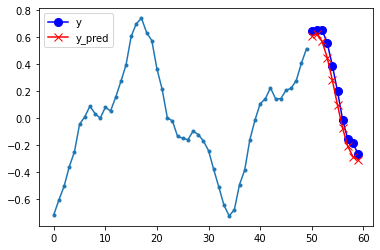

In [6]:
series = utils.generate_time_series(1, history_steps + forecast_steps, seed=43)
print(f"series.shape = {series.shape}")
x_new, y_new = series[:, :history_steps], series[:, -forecast_steps:]
x_new = np.expand_dims(x_new, -1)
print(f"x_new.shape = {x_new.shape}, y_new.shape = {y_new.shape}")

y_pred = model.predict(x_new)
print(f"y_pred.shape = {y_pred.shape}")
utils.plot_series_multiple_forecasts(x_new, y_new, y_pred[0, -1, :])